# Lecture 6. 최적화

> Eunmi Kim    
계산과학 프로그래밍 및 실습

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 일변수 함수 최적화

### 1.1 수치 미분

In [ ]:
def numerical_diff(f, x, h=1e-6):
    return (f(x+h)-f(x))/h

In [ ]:
def numerical_diff2(f, x, h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [ ]:
f1 = lambda x : x**2
print(numerical_diff(f1, 1))
print(numerical_diff2(f1, 1))

2.0000009999243673
2.000000000002


### 1.2 경사하강법을 이용한 일변수 함수 최적화

In [ ]:
def gradient_descent(func, init_x, lr=0.01, iteration=100):
    x = init_x #초기 x값
    x_history = [init_x] #x의 list

    for i in range(iteration):
        grad = numerical_diff2(func, x)
        x -= lr * grad
        x_history.append(x)

    return x, np.array(x_history)

실험

In [ ]:
init_x = 2
lr = 0.1
iteration = 20

x, x_history = gradient_descent(f1, init_x, lr=lr, iteration=iteration)
print("%s에서 시작해서 %s번 경사하강법(lr=%.2f) 적용한 결과는 %.3f"%(init_x, iteration, lr, x))

2에서 시작해서 100번 경사하강법(lr=0.10) 적용한 결과는 0.000


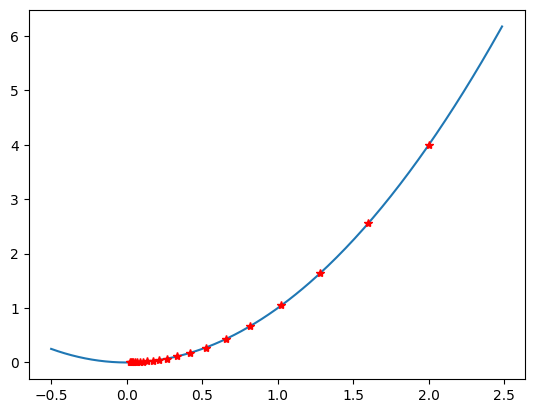

In [ ]:
x_s, x_e = -0.5, 2.5

x = np.arange(x_s, x_e, (x_e - x_s)/200)
plt.plot(x, f1(x), x_history, f1(x_history), 'r*')
plt.show()

### 1.3 학습률이 미치는 영향

학습률이 너무 작을 때

In [ ]:
init_x = 2
lr = 0.01
iteration = 100

x, x_history = gradient_descent(f1, init_x, lr=lr, iteration=iteration)
print("%s에서 시작해서 %s번 경사하강법(lr=%.2f) 적용한 결과는 %.3f"%(init_x, iteration, lr, x))

2에서 시작해서 100번 경사하강법(lr=0.01) 적용한 결과는 0.265


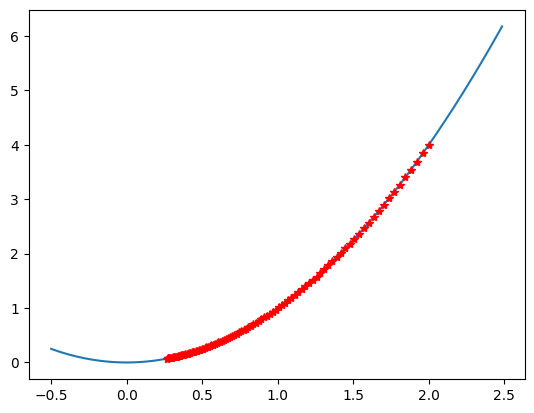

In [ ]:
x_s, x_e = -0.5, 2.5

x = np.arange(x_s, x_e, (x_e - x_s)/200)
plt.plot(x, f1(x), x_history, f1(x_history), 'r*')
plt.show()

#개미똥만큼 움직여서 속도가 느리다아..

학습률이 너무 클 때

In [ ]:
init_x = 2
lr = 2
iteration = 4

x, x_history = gradient_descent(f1, init_x, lr=lr, iteration=iteration)
print("%s에서 시작해서 %s번 경사하강법(lr=%.2f) 적용한 결과는 %.3f"%(init_x, iteration, lr, x))

2에서 시작해서 4번 경사하강법(lr=2.00) 적용한 결과는 162.000


In [ ]:
print(x_history)

[  2.          -6.          18.         -54.0000001  161.99999981]


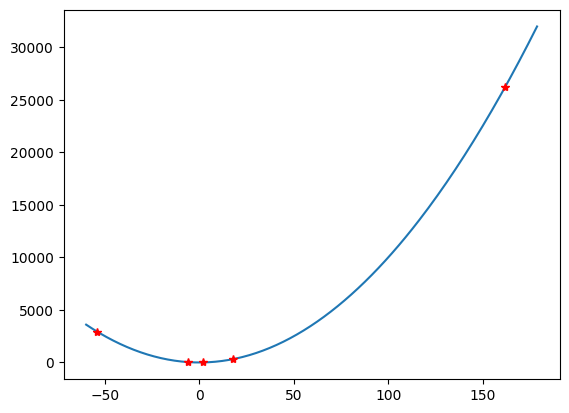

In [ ]:
x_s, x_e = -60, 180

x = np.arange(x_s, x_e, (x_e - x_s)/200)
plt.plot(x, f1(x), x_history, f1(x_history), 'r*')
plt.show()

#너무 많이 움직임 ;;

### 1.4 기울기가 너무 작을 때

기울기가 0인 구간이 있을 때

In [ ]:
def f2(x):
    if x > 1:
        return x**2
    elif x > 0.2:
        return 1
    else:
        return 25*(x**2)

In [ ]:
init_x = 2
lr = 0.01
iteration = 200

x, x_history = gradient_descent(f2, init_x, lr=lr, iteration=iteration)
print("%s에서 시작해서 %s번 경사하강법(lr=%.2f) 적용한 결과는 %.3f"%(init_x, iteration, lr, x))

2에서 시작해서 200번 경사하강법(lr=0.01) 적용한 결과는 0.986


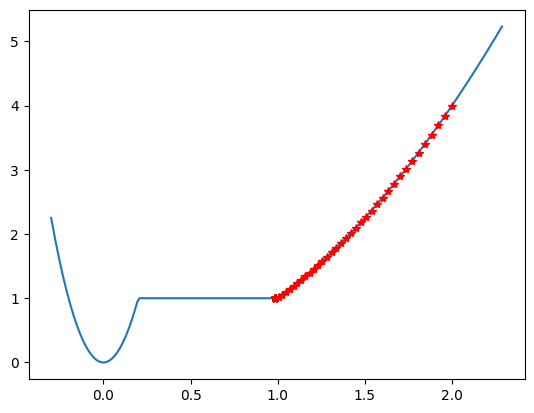

In [ ]:
x_s, x_e = -0.3, 2.3

x = np.arange(x_s, x_e, (x_e - x_s)/200)
vf2 = np.vectorize(f2)
plt.plot(x, vf2(x), x_history, vf2(x_history), 'r*')
plt.show()

#기울기가 0인경우 멈춰버림 ....

### 1.5 모멘텀 방법을 이용한 경사하강법

In [ ]:
def Momentum(func, init_x, h=1e-6, lr=0.01, mu=0.9, iteration=100):
  #관성 이용
  #mu:이전 방향에 대한 정보 얼마나 반영할지
    v = 0 #이전 정보
    x = init_x
    x_history = [init_x]

    for i in range(iteration):
        v = mu * v - lr * numerical_diff2(func, x, h)
        x += v
        x_history.append(x)

    return x, np.array(x_history)

In [ ]:
init_x = 2
mu = 0.9
lr = 0.01
iteration = 50

x, x_history = Momentum(f2, init_x, lr=lr, mu=mu, iteration=iteration)
print("%s에서 시작해서 %s번 모멘텀 경사하강법(mu=%.2f, lr=%.2f) 적용한 결과는 %.3f"%(init_x, iteration, mu, lr, x))

2에서 시작해서 50번 모멘텀 경사하강법(mu=0.90, lr=0.01) 적용한 결과는 -0.004


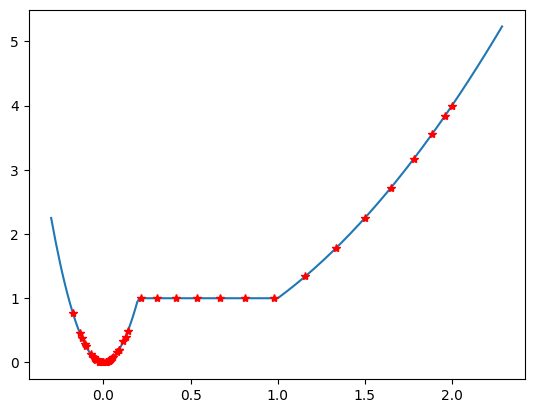

In [ ]:
x_s = -0.3
x_e = 2.3

x = np.arange(x_s, x_e, (x_e - x_s)/200)
plt.plot(x, vf2(x), x_history, vf2(x_history), 'r*')
plt.show()

## 2. 이변수 함수 최적화


### 2.1 이변수 함수의 수치미분

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4     # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

### 2.2 경사하강법을 이용한 이변수 함수 최적화

In [ ]:
def gradient_descent2(func, init_x, lr=0.01, iteration=100):
    x = init_x
    x_history = [init_x.copy()]       # init_x의 값만 가져와서 list에 추가

    for i in range(iteration):
        grad = numerical_gradient(func, x)
        x -= lr * grad
        x_history.append(x.copy()) #x.copy해줘야함

    return x, np.array(x_history)

In [ ]:
f3 = lambda x: x[0]**2 + x[1]**2

In [ ]:
init_x = np.array([-4.0, 4.0])
lr = 0.1
iteration = 100

x, x_history = gradient_descent2(f3, init_x, lr=lr, iteration=iteration)
print(x)

[-8.14814391e-10  8.14814391e-10]


In [ ]:
x_history[:10]

array([[-4.        ,  4.        ],
       [-3.2       ,  3.2       ],
       [-2.56      ,  2.56      ],
       [-2.048     ,  2.048     ],
       [-1.6384    ,  1.6384    ],
       [-1.31072   ,  1.31072   ],
       [-1.048576  ,  1.048576  ],
       [-0.8388608 ,  0.8388608 ],
       [-0.67108864,  0.67108864],
       [-0.53687091,  0.53687091]])

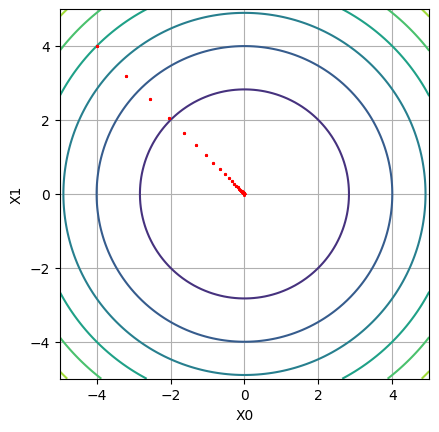

In [ ]:
x_range = np.linspace(-5, 5, 100)    # np.arange(-5, 5, 0.1)
y_range = np.linspace(-5, 5, 100)

xy_mesh = np.meshgrid(x_range, y_range)
z_mesh = f3(xy_mesh)

plt.contour(xy_mesh[0], xy_mesh[1], z_mesh) #등위곡선 그리는 방법

plt.plot(x_history[:, 0], x_history[:, 1], 'r*',  markersize=2)
plt.axis('square')
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid('True')
plt.show()

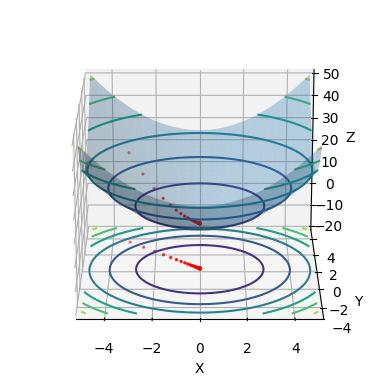

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot_surface(xy_mesh[0], xy_mesh[1], z_mesh, alpha=0.3)

ax.contour(xy_mesh[0], xy_mesh[1], z_mesh,  zdir='z')
ax.contour(xy_mesh[0], xy_mesh[1], z_mesh,  zdir='z', offset=-20)

ax.scatter(x_history[:, 0], x_history[:, 1], f3(x_history.T), c='r', s=2)
ax.scatter(x_history[:, 0], x_history[:, 1], zs=-20, c='r', s=2)

ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(-20, 50), xlabel='X', ylabel='Y', zlabel='Z')
ax.view_init(elev=20, azim=-90)

plt.show()

### 2.3 기울기가 최솟값 방향을 가리키지 않을 경우

In [ ]:
f4 = lambda x: x[0]**2/20 + x[1]**2

In [ ]:
init_x = np.array([-7.0, 4.0])
lr = 0.01
iteration = 400

x, x_history = gradient_descent2(f4, init_x, lr=lr, iteration=iteration)
print(x)

[-4.69130134e+00  1.23734346e-03]


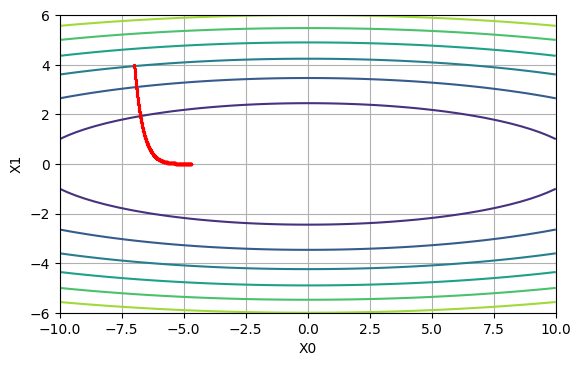

In [ ]:
xs, xe = -10, 10
ys, ye = -6, 6

x_range = np.linspace(xs, xe, 100)
y_range = np.linspace(ys, ye, 100)

xy_mesh = np.meshgrid(x_range, y_range)
z_mesh = f4(xy_mesh)


plt.contour(xy_mesh[0], xy_mesh[1], z_mesh)

plt.plot(x_history[:, 0], x_history[:, 1], 'r*', markersize=2)
plt.axis('scaled')
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid('True')
plt.show()

### 2.4 Momentum

In [ ]:
def Momentum2(func, init_x, lr=0.01, mu=0.9, iteration=100):
    v = np.zeros_like(init_x)
    x = init_x
    x_history = [init_x.copy()]

    for i in range(iteration):
        v = mu * v - lr * numerical_gradient(func, x)
        x += v

        x_history.append(x.copy())

    return x, np.array(x_history)

In [ ]:
init_x = np.array([-7.0, 4.0])
mu = 0.9
lr = 0.01
iteration = 400

x, x_history = Momentum2(f4, init_x, lr=lr, mu=mu, iteration=iteration)
print(x)

[-8.99256038e-02 -2.66034499e-09]


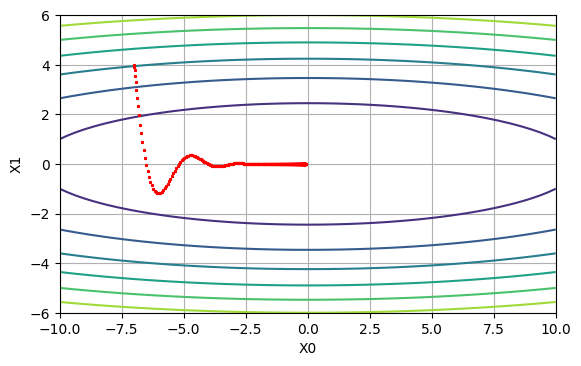

In [ ]:
xs, xe = -10, 10
ys, ye = -6, 6

x_range = np.linspace(xs, xe, 100)
y_range = np.linspace(ys, ye, 100)

xy_mesh = np.meshgrid(x_range, y_range)
z_mesh = f4(xy_mesh)

plt.contour(xy_mesh[0], xy_mesh[1], z_mesh)

plt.plot(x_history[:, 0], x_history[:, 1], 'r*',  markersize=2)
plt.axis('scaled')
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid('Ture')
plt.show()

### 2.5 RMSProp

In [ ]:
def RMSProp(func, init_x, lr=0.01, gamma=0.99, iteration=1000):
    h = np.zeros_like(init_x)
    x = init_x
    x_history = [init_x.copy()]

    for i in range(iteration):
        grad = numerical_gradient(func, x)
        h *= gamma
        h += (1.0 - gamma) * grad * grad
        x -= lr * grad /(np.sqrt(h) + 1e-7)
        x_history.append(x.copy())

    return x, np.array(x_history)

In [ ]:
init_x = np.array([-7.0, 4.0])
gamma = 0.99
lr = 0.01
iteration = 800

x, x_history = RMSProp(f4, init_x, lr=lr, gamma=gamma, iteration=iteration)
print(x)

[-2.20462178e-01  2.58496713e-07]


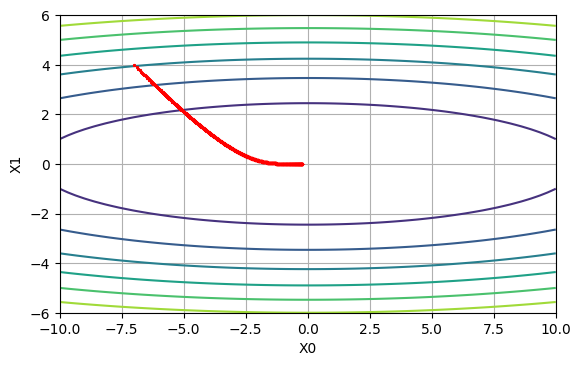

In [ ]:
xs, xe = -10, 10
ys, ye = -6, 6

x_range = np.linspace(xs, xe, 100)
y_range = np.linspace(ys, ye, 100)

xy_mesh = np.meshgrid(x_range, y_range)
z_mesh = f4(xy_mesh)

plt.contour(xy_mesh[0], xy_mesh[1], z_mesh)

plt.plot(x_history[:, 0], x_history[:, 1], 'r*',  markersize=2)
plt.axis('scaled')
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid('True')
plt.show() #100번했는데도 아직 도달 제대로 못함 ㅠ 좀 느려요;;

### 2.6 ADAM

In [ ]:
def ADAM(func, init_x, lr=0.01,  beta1=0.9, beta2=0.999, iteration=1000):
    m = np.zeros_like(init_x)
    v = np.zeros_like(init_x)
    x = init_x
    x_history = [init_x.copy()]

    for i in range(1, iteration+1):
        lr_i  = lr * np.sqrt(1.0 - beta2**i) / (1.0 - beta1**i)

        grad = numerical_gradient(func, x)

        m += (1 - beta1) * (grad - m)
        v += (1 - beta2) * (grad**2 - v)

        x -= lr_i * m /(np.sqrt(v) + 1e-7)

        x_history.append(x.copy())

    return x, np.array(x_history)

In [ ]:
init_x = np.array([-7.0, 4.0])
beta1 = 0.9
beta2 = 0.99
lr = 0.01
iteration = 800

x, x_history = ADAM(f4, init_x, lr=lr, beta1=beta1, beta2=beta2, iteration=iteration)
print(x)

[-6.24805103e-01 -2.54134575e-05]


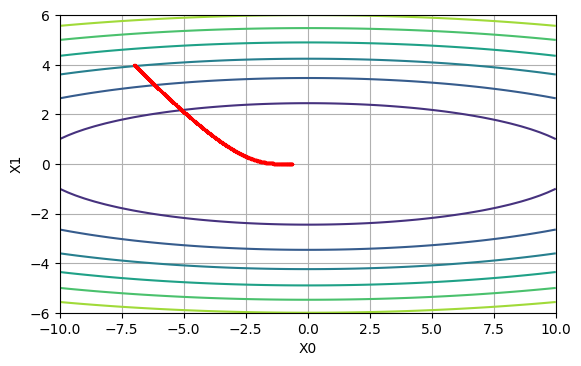

In [ ]:
xs, xe = -10, 10
ys, ye = -6, 6

x_range = np.linspace(xs, xe, 100)
y_range = np.linspace(ys, ye, 100)

xy_mesh = np.meshgrid(x_range, y_range)
z_mesh = f4(xy_mesh)

plt.contour(xy_mesh[0], xy_mesh[1], z_mesh)

plt.plot(x_history[:, 0], x_history[:, 1], 'r*',  markersize=2)
plt.axis('scaled')
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid('True')
plt.show() #얘도 느리다;